# Replication assignment

Replicate the results found in [Bryant et al  (2010)](https://doi.org/10.1016/j.techfore.2009.08.002), [Rozenberg et al (2014)](https://link.springer.com/content/pdf/10.1007/s10584-013-0904-3.pdf), and [Hamarat et al (2013)](https://doi.org/10.1016/j.techfore.2012.10.004). The data files are named accordingly. You can also look at [Kwakkel & Jaxa-Rozen (2016)](https://www.sciencedirect.com/science/article/pii/S1364815215301092), which gives a succint summary of these three cases. 

An additional useful, if dated, resource for Bryant et al is https://waterprogramming.wordpress.com/2015/08/05/scenario-discovery-in-python/ 



In [1]:
import pandas as pd
from ema_workbench.analysis import prim, cart

# Bryant & Lempert

Load the data using pandas. The experiments are in colums 2-10, while the outcome is in column 15. If you look at the paper carefully, you will see that they change the peel_alpha in PRIM. This controls the leniency of the algorithm.


In [2]:
bryant_df = pd.read_csv("data/Bryant et al 2010.csv")

In [3]:
exp = bryant_df.iloc[:, 2:11]
res = bryant_df.iloc[:, 15]

In [4]:
prim_alg = prim.Prim(exp, res, threshold=0.5, peel_alpha=0.02)
box1 = prim_alg.find_box()

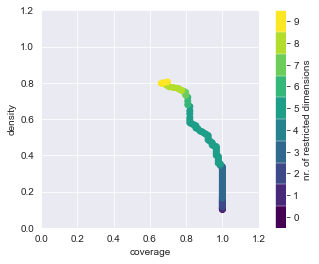

In [5]:
import matplotlib.pyplot as plt
 
box1.show_tradeoff()
plt.show()

coverage     1.000000
density      0.178357
id          25.000000
mass         0.565760
mean         0.178357
res_dim      3.000000
Name: 25, dtype: float64

                            box 25              \
                               min         max   
Biomass backstop price  114.849998  199.600006   
Demand elasticity        -0.736500   -0.202000   
Total biomass           457.699997  921.899994   

                                                                    
                                                         qp values  
Biomass backstop price               [0.0023711895365110154, -1.0]  
Demand elasticity                       [0.1424131036695699, -1.0]  
Total biomass           [0.42863793816604395, 0.07362454129813158]  



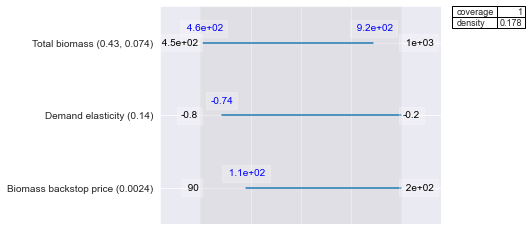

In [6]:
box1.inspect(25)
box1.inspect(25, style='graph')
plt.show()

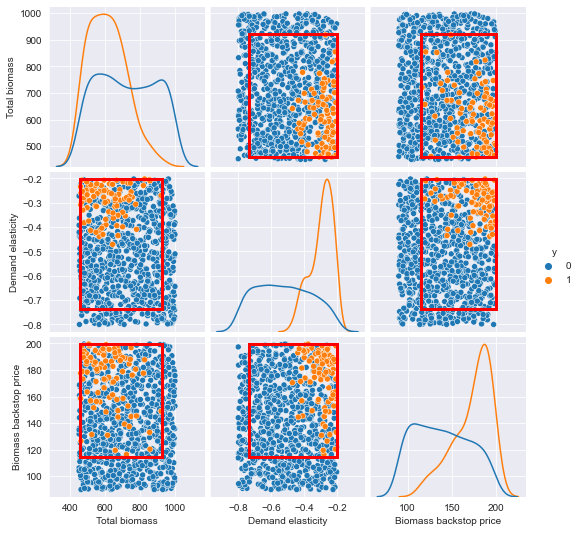

In [7]:
box1.select(25)
fig = box1.show_pairs_scatter()
plt.show()

In [8]:
cart_alg = cart.CART(exp,res, 0.05)
cart_alg.build_tree()

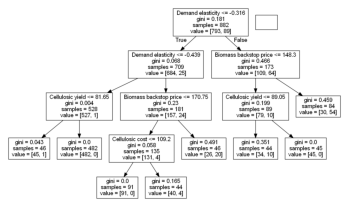

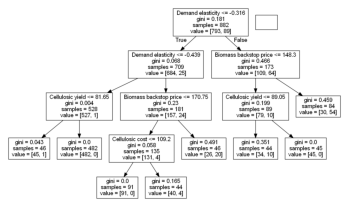

In [9]:
cart_alg.show_tree()

# Rozenberg et al


* The experiments are the first seven columns. The remainder specify whether a given experiment belongs to a given SSP.
* Apply prim separately for each SSP
* you have to play with the threshold for each SSP, the default of 0.8 is at times too high
* if you look at the paper carefully, you will discover that they change some of the default parameters of PRIM


In [10]:
rozen_df = pd.read_csv("data/Rozenberg et al 2014.csv")
rozen_df

,inequalities,convergence,population,behaviors,technologies,fossils,capital markets,SSP1,SSP2,SSP3,SSP4,SSP5
0,0,2,0,0,0,0,0,0,0,0,0,0
1,0,2,0,0,0,0,1,0,0,0,0,0
2,0,2,0,0,0,1,0,0,0,0,0,0
3,0,2,0,0,0,1,1,0,0,0,0,0
4,0,2,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
281,1,1,2,1,0,1,1,0,0,0,0,0
282,1,1,2,1,1,0,0,1,0,0,0,0
283,1,1,2,1,1,0,1,1,0,0,0,0
284,1,1,2,1,1,1,0,0,0,0,0,0


In [11]:
exp = rozen_df.iloc[:, 0:7]
res = rozen_df.iloc[:, 7]

In [12]:
prim_alg = prim.Prim(exp, res, threshold=0.8, peel_alpha=0.2)
box2 = prim_alg.find_box()

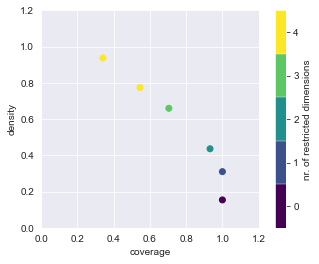

In [13]:
box2.show_tradeoff()
plt.show()

coverage    0.704545
density     0.659574
id          3.000000
mass        0.164336
mean        0.659574
res_dim     3.000000
Name: 3, dtype: float64

             box 3                                     
               min  max                       qp values
population     0.0  1.0    [-1.0, 0.005972420192480501]
behaviors      1.0  1.0  [1.4697687357816245e-06, -1.0]
inequalities   1.0  1.0   [0.0009772191279316862, -1.0]



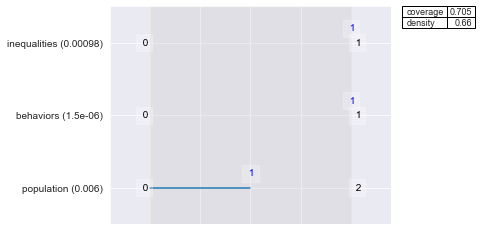

In [14]:
box2.inspect(3)
box2.inspect(3, style='graph')
plt.show()

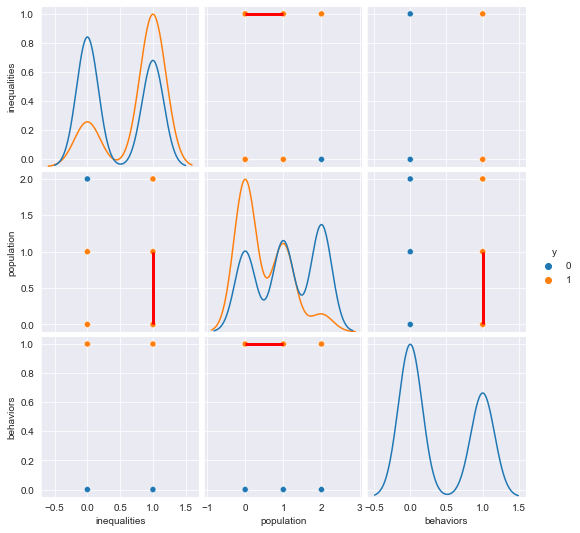

In [15]:
box2.select(3)
fig = box2.show_pairs_scatter()
plt.show()

# Hamarat et al

this is the most difficult dataset to analyze with prim. It has been generated using the ema_workbench and can be loaded with the `load_results` function. Experiments are of interest if the end state for `'fraction renewables'` is lower than the initial value.

* PRIM struggles with finding a good explanation for this case, why?
* [Dalal et al (2013)](https://www.sciencedirect.com/science/article/pii/S1364815213001345) suggest using PCA preprocessing. The ema_workbench supports this with the `pca_preprocess` function. See also examples/prim_PCA_preprocess.py. Does PCA preprocessing makes a difference for this case?


In [16]:
data = outcomes['fraction renewables']
# y = data[0,:] < data[-1, :]
r1 = outcomes[y1] < t1
r2 = outcomes[y2] > t2
r3 = outocmes[y3] < t3
rc = r1 or (r2 or r3)


NameError: name 'outcomes' is not defined